# Propagación de la afinidad

In [1]:
# Importar las librerías
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

In [2]:
# Centros respecto de los cuales se generarán los clústers
centers = [[1,1], [-1,-1], [1,-1]]

# Se generan las X, y las diferentes etiquetas
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)  # <- Crear 300 muestras en el sample
                                                                                         # <- random_state = semilla

In [3]:
# Crear plot de los valores creados
import matplotlib.pyplot as plt
from itertools import cycle

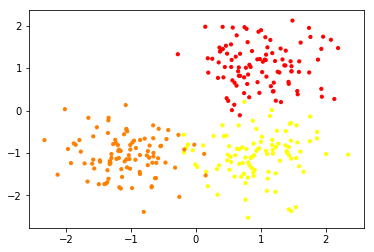

In [6]:
# Pintar los puntos generados en X (de X todas las filas columna 0, y todas las filas columna 1)
plt.scatter(X[:,0], X[:,1], c=labels, s = 10, cmap = "autumn")   #<- s = tamaño de los puntos

#### Establecer parámetro de partida

In [7]:
# Parámetro de partida
af = AffinityPropagation(preference=-50).fit(X)

In [8]:
# Clúster indices
cluster_center_ids = af.cluster_centers_indices_

In [9]:
# Etiquetas ¿A que clúster pertenece cada punto?
lables = af.labels_

In [10]:
# Número de clústers que ha creado el método
n_clust = len(cluster_center_ids)
n_clust

3

#### Reporte del affinity propagation dado un conjunto de datos

In [29]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
#     print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col +'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Número estimado de clusters %d"%n_clust)
    plt.show()

Número estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
R2 ajustado: 0.912
Información mútua ajustada: 0.871
Coeficiente de la silueta: 0.735


C:\Users\TOM.ZG\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


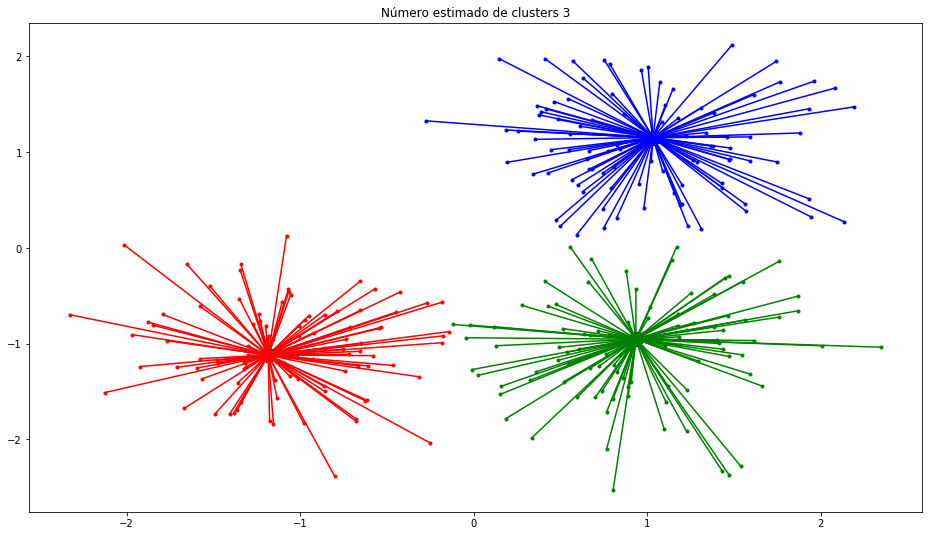

In [30]:
# Ejecuta función de reporte de afinidad de propagación
report_affinity_propagation(X)

(array([ 99.,   0.,   0.,   0.,   0., 101.,   0.,   0.,   0., 100.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

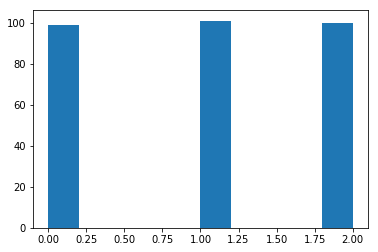

In [31]:

plt.hist(af.labels_)